This notebook demonstrates the enhancement of classification performance by applying the K-Nearest Neighbors (KNN) algorithm over a dataset that has been pre-clustered. Here's a breakdown of the key components and processes:

1. **Data Loading and Preprocessing:**
   - The dataset, already pre-clustered, is loaded into a DataFrame.
   - Features and target variables are defined based on the clustered dataset.
   - The dataset is split into training, validation, and test sets.

2. **Model Building and Evaluation:**
   - A KNN classifier is trained on the training data, utilizing the pre-clustered features.
   - Hyperparameter tuning is performed to find the optimal value of K (number of neighbors) using cross-validation.
   - The best K value is selected based on validation accuracy, leveraging the pre-clustered dataset.
   - The final model is trained using this optimal K value, taking advantage of the clustered features.

3. **Model Evaluation and Visualization:**
   - The performance of the KNN model, applied over the pre-clustered dataset, is evaluated using test data.
   - Evaluation metrics such as accuracy, confusion matrix, and classification report provide insights into the model's performance.
   - ROC curve and Area Under the Curve (AUC) score illustrate the model's ability to distinguish between classes, leveraging the clustered features.

4. **Conclusion:**
   - The application of KNN over the pre-clustered dataset yields improved classification performance compared to previous attempts without clustering.
   - By leveraging the pre-clustered features, the model benefits from enhanced data structure and organization, leading to more accurate predictions.
   - The results obtained signify the effectiveness of clustering as a preprocessing step in classification tasks, enabling better utilization of data patterns and relationships.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
# Load the data from the CSV file
data = pd.read_csv("dataset_after_clustering.csv")

# Selecting features and target variable
X_data = data.loc[:, ["runs_to_be_scored", "balls_remaining", "wickets_remaining", "label"]]
Y_data = data.loc[:, ["match_winner"]]

# Splitting the data into training, validation, and test sets
train_data, test_data, train_label, test_label = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size=0.1, random_state=42)

In [9]:
# Generating a list of odd values for k
k_vals = list(range(1, 200, 2))

# List to store accuracies
accuracy = []

# Computing accuracies of KNN for odd k values from 1 to 200 using validation data
for k in k_vals:
    # Initialize and train the KNN model
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_data, train_label.values.ravel())
    
    # Calculate accuracy on validation data
    acc = model.score(val_data, val_label) * 100
    
    # Append accuracy to the list
    accuracy.append(acc)
    
    # Print the k value and corresponding accuracy
    print("kvalue=", k, "score=", acc)

kvalue=1score71.8592279361615
kvalue=3score75.21484108580003
kvalue=5score76.03328331741918
kvalue=7score76.76988132587641
kvalue=9score77.27458736870823
kvalue=11score77.16546173782567
kvalue=13score77.3291501841495
kvalue=15score77.71108989223843
kvalue=17score77.83385622698131
kvalue=19score77.91570045014323
kvalue=21score77.94298185786387
kvalue=23score78.52953212385759
kvalue=25score78.17487382348929
kvalue=27score78.21579593507025
kvalue=29score78.16123311962897
kvalue=31score78.4749693084163
kvalue=33score78.33856226981312
kvalue=35score78.36584367753376
kvalue=37score78.36584367753376
kvalue=39score78.32492156595279
kvalue=41score78.4749693084163
kvalue=43score78.32492156595279
kvalue=45score78.27035875051152
kvalue=47score78.29764015823216
kvalue=49score78.36584367753376
kvalue=51score78.18851452734961
kvalue=53score78.28399945437184
kvalue=55score78.42040649297503
kvalue=57score78.33856226981312
kvalue=59score78.37948438139408
kvalue=61score78.42040649297503
kvalue=63score78.

In [10]:
# Finding the best k value based on the maximum accuracy
best_k = k_vals[np.argmax(accuracy)]

# Evaluating test data with the best k value
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(train_data, train_label.values.ravel())
final_score = model.score(test_data, test_label) * 100

# Printing the best result
print("best result is aquired for k value %d with accuracy of %.2f%%" % (best_k, final_score))

best result is aquired for k value 23 with accuracy of 77.61


In [12]:
predictions=model.predict(testdata)
confusion_matrix(predictions,testlabel)

array([[6255, 1943],
       [2160, 7970]])

In [13]:
print(classification_report(testlabel,predictions))

              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      8415
         1.0       0.79      0.80      0.80      9913

    accuracy                           0.78     18328
   macro avg       0.77      0.77      0.77     18328
weighted avg       0.78      0.78      0.78     18328



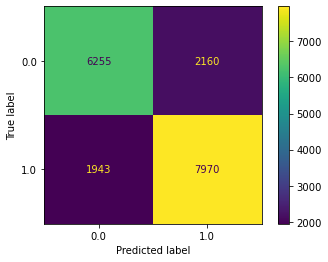

In [14]:
# Compute confusion matrix
cm = confusion_matrix(test_label, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [15]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [17]:
# Compute class probabilities for the positive class
probs = model.predict_proba(test_data)[:, 1]

# Compute AUC score
auc = roc_auc_score(test_label, probs)
print('AUC: %.2f' % auc)

AUC: 0.87


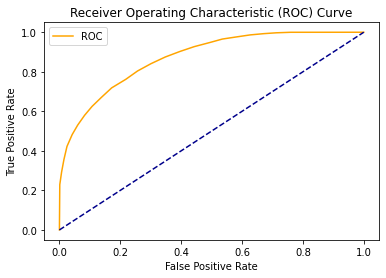

In [18]:
from sklearn.metrics import roc_curve

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(test_label, probs)

# Plot ROC curve
plot_roc_curve(fpr, tpr)